<a href="https://colab.research.google.com/github/nimamt/machine_learning/blob/master/General/UkraineWar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ukraine War Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
! pip install kaggle
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
! kaggle datasets download piterfm/2022-ukraine-russian-war

  0% 0.00/2.50k [00:00<?, ?B/s]
100% 2.50k/2.50k [00:00<00:00, 4.44MB/s]


In [6]:
! unzip 2022-ukraine-russian-war.zip

Archive:  2022-ukraine-russian-war.zip
  inflating: russia_losses_equipment.csv  
  inflating: russia_losses_personnel.csv  


In [18]:
df0 = pd.read_csv('/content/russia_losses_personnel.csv')

In [19]:
df1 = pd.read_csv('/content/russia_losses_equipment.csv')

In [20]:
df0.head()

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0
1,2022-02-26,3,4300,about,0
2,2022-02-27,4,4500,about,0
3,2022-02-28,5,5300,about,0
4,2022-03-01,6,5710,about,200


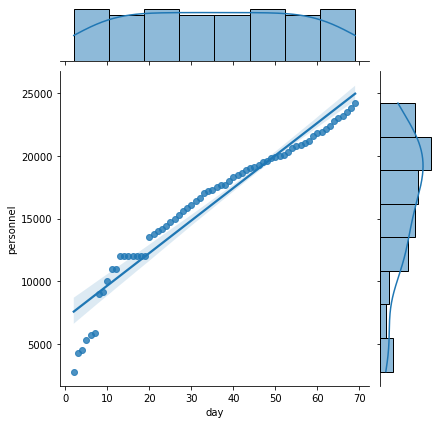

In [26]:
sns.jointplot(x='day', y='personnel', data=df0, kind='reg')

In [29]:
df0['increase'] = df0['personnel'].pct_change()

In [31]:
df0.head()

,date,day,personnel,personnel*,POW,increase
0,2022-02-25,2,2800,about,0,NaN
1,2022-02-26,3,4300,about,0,0.535714
2,2022-02-27,4,4500,about,0,0.046512
3,2022-02-28,5,5300,about,0,0.177778
4,2022-03-01,6,5710,about,200,0.077358


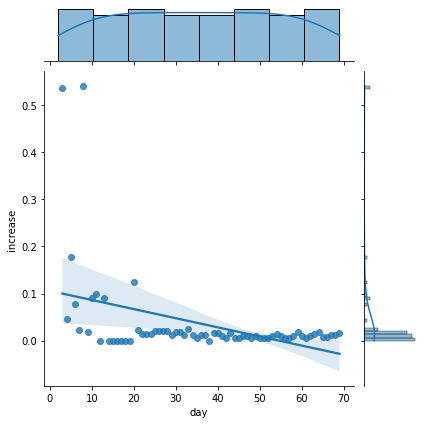

In [30]:
sns.jointplot(x='day', y='increase', data=df0, kind='reg')

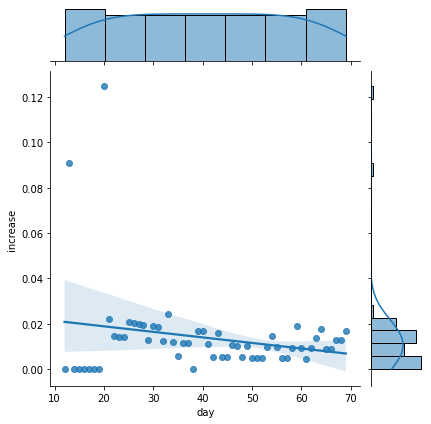

In [32]:
sns.jointplot(x='day', y='increase', data=df0[10:], kind='reg')

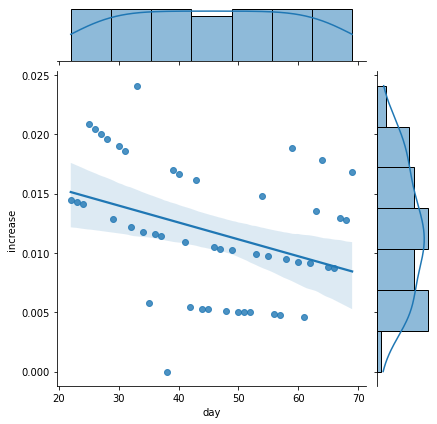

In [33]:
sns.jointplot(x='day', y='increase', data=df0[20:], kind='reg')

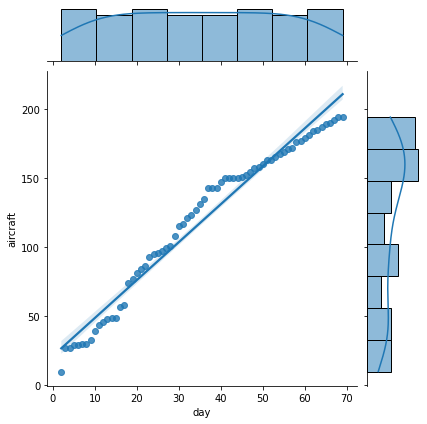

In [34]:
sns.jointplot(x='day', y='aircraft', data=df1, kind='reg')

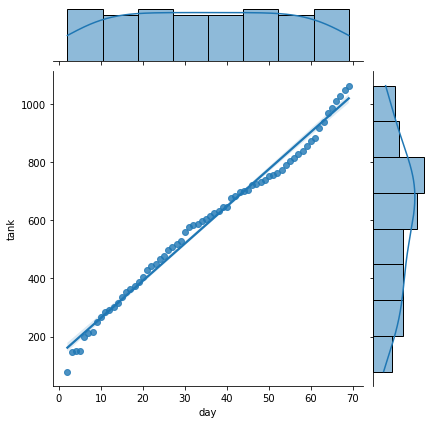

In [35]:
sns.jointplot(x='day', y='tank', data=df1, kind='reg')

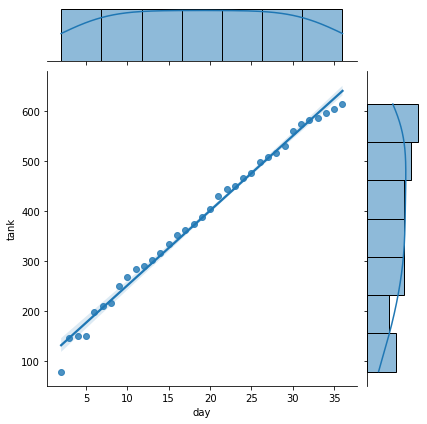

In [44]:
sns.jointplot(x='day', y='tank', data=df1[:35], kind='reg')

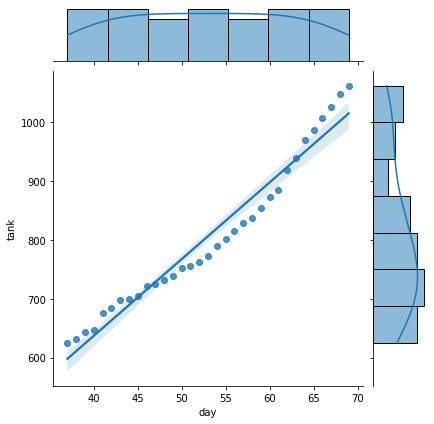

In [46]:
sns.jointplot(x='day', y='tank', data=df1[35:], kind='reg')

In [49]:
df1['aircraft_increase'] = df1['aircraft'].pct_change()

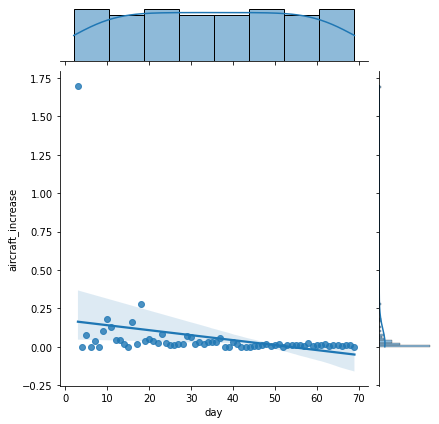

In [53]:
sns.jointplot(x='day', y='aircraft_increase', data=df1, kind='reg')

In [71]:
q25, q75 = np.percentile(df1[1:]['aircraft_increase'], 25), np.percentile(df1[1:]['aircraft_increase'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

In [74]:
lower

-0.03489161557784548

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


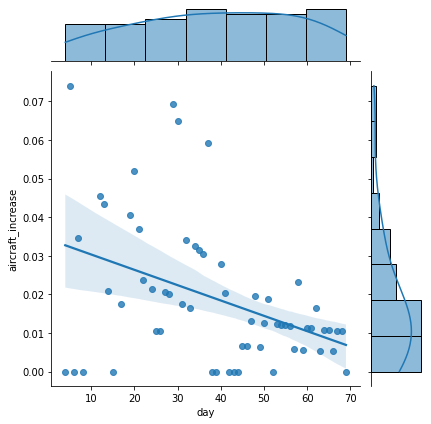

In [76]:
sns.jointplot(x='day', y='aircraft_increase', data=df1[1:][(df1['aircraft_increase'] > lower) & (df1['aircraft_increase'] < upper)], kind='reg')

In [68]:
lower

nan